In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import torchio as tio

from modules.Utils import plot_sub

In [2]:
mri = nib.load('../Data/feta_processed2/sub-001/anat/sub-001_rec-mial_T2w.nii.gz').get_fdata()
mask = nib.load('../Data/feta_processed2/sub-001/anat/sub-001_rec-mial_dseg.nii.gz').get_fdata()

mri_orig = nib.load('../../../Original/feta_2.1/sub-001/anat/sub-001_rec-mial_T2w.nii.gz').get_fdata()
mask_orig = nib.load('../../../Original/feta_2.1/sub-001/anat/sub-001_rec-mial_dseg.nii.gz').get_fdata()

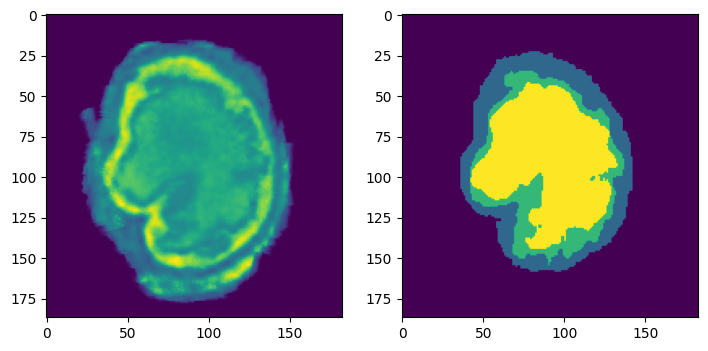

In [3]:
index = 38
plot_sub(mri[index], mask[index])

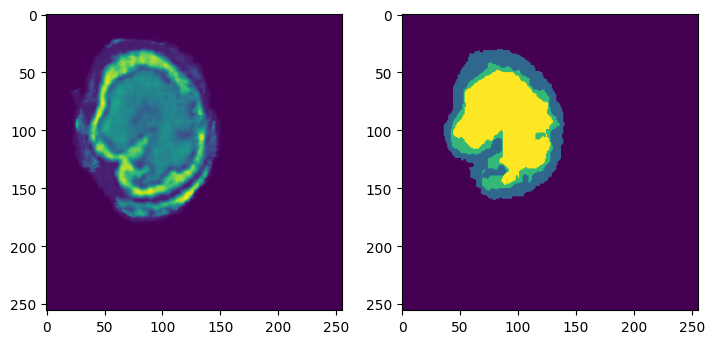

In [4]:
plot_sub(mri_orig[index], mask_orig[index])

In [5]:
def get_patch_sizes(shape):
    patches = [[64, 128, shape[2]], [32, shape[1], shape[2]],
               [128, 64, shape[2]], [shape[0], 32, shape[2]],
               [128, shape[1], 64], [shape[0], shape[1], 32],
               [128, 128, 128]]

    return patches

def get_center_point(patch_size, max_size=(256, 256, 256)):
    x = max_size[0]-patch_size[0]
    y = max_size[1]-patch_size[1]
    z = max_size[2]-patch_size[2]
    
    if x:
        x = np.random.randint(0, x)
    if y:   
        y = np.random.randint(0, y)
    if z:
        z = np.random.randint(0, z)
    
    return (x, y, z)

def get_patches(mri, mask):
    patch_sizes = get_patch_sizes(mri.shape)
    
    
    patches = []
    
    for patch_size in patch_sizes:
        x, y, z = get_center_point(patch_size, mri.shape)
        mri_patch = mri[x:x+patch_size[0], y:y+patch_size[1], z:z+patch_size[2]]
        mask_patch = mask[x:x+patch_size[0], y:y+patch_size[1], z:z+patch_size[2]]
        patches.append((mri_patch, mask_patch))

    return patches

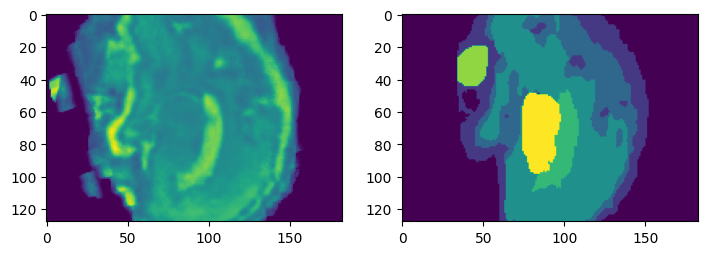

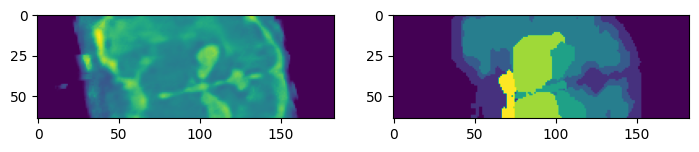

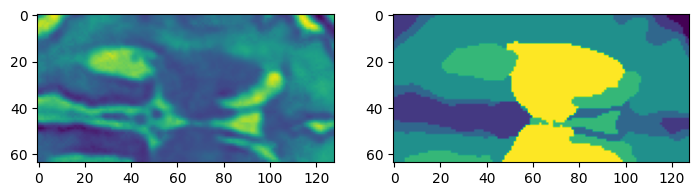

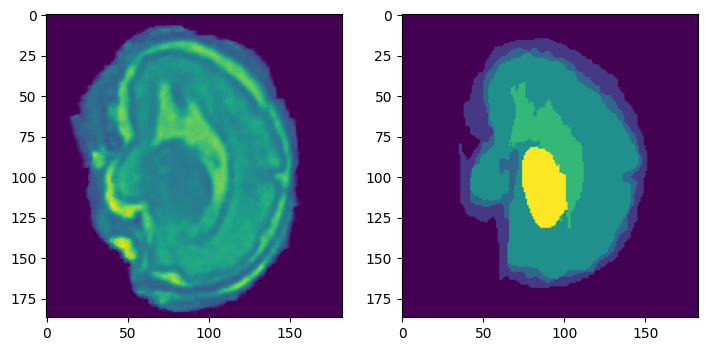

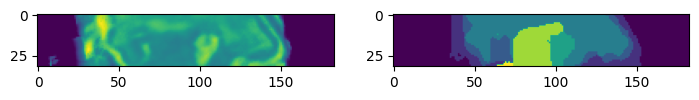

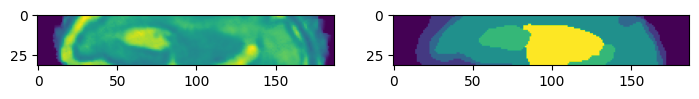

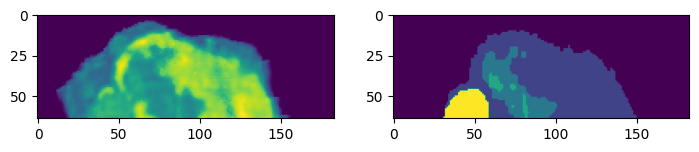

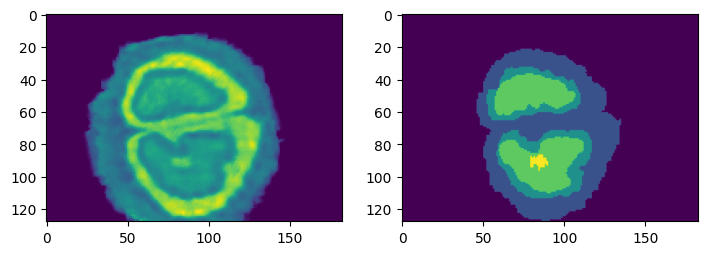

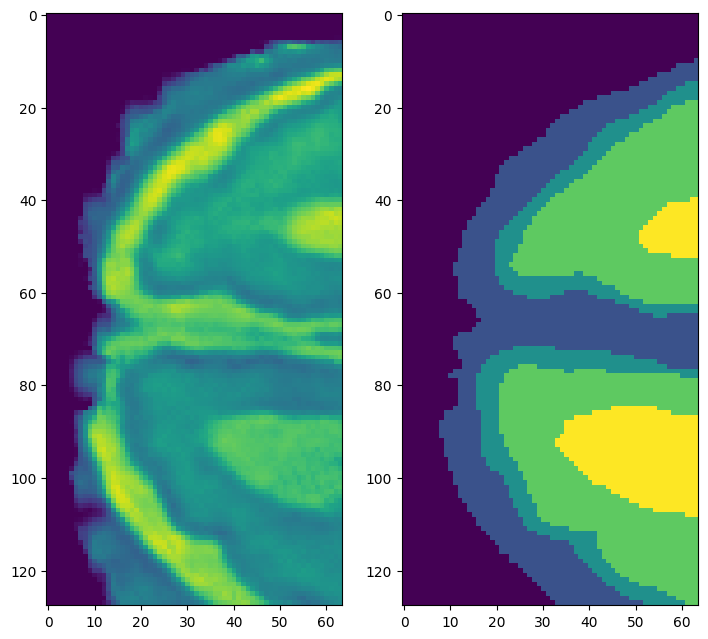

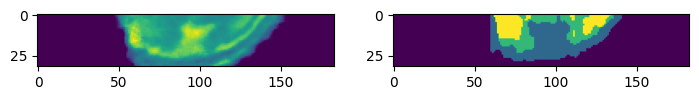

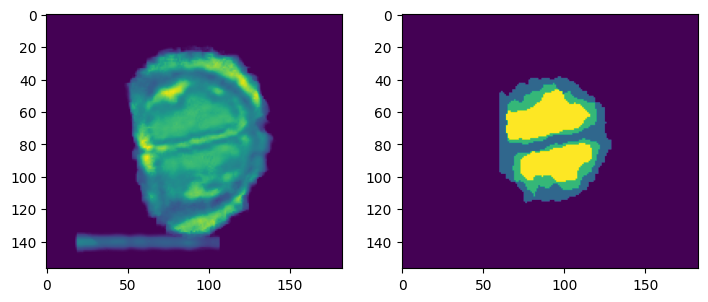

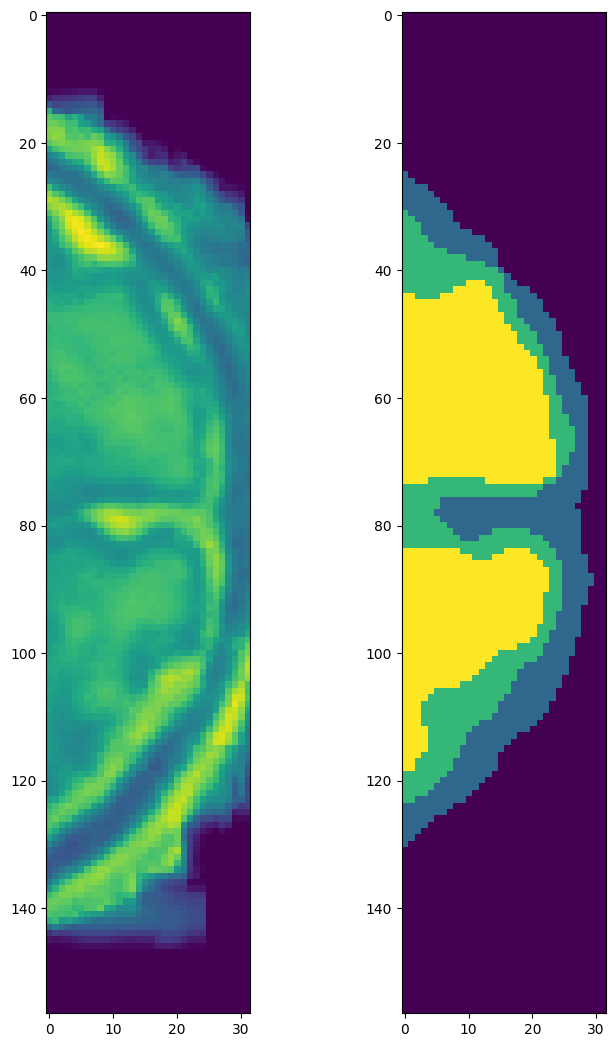

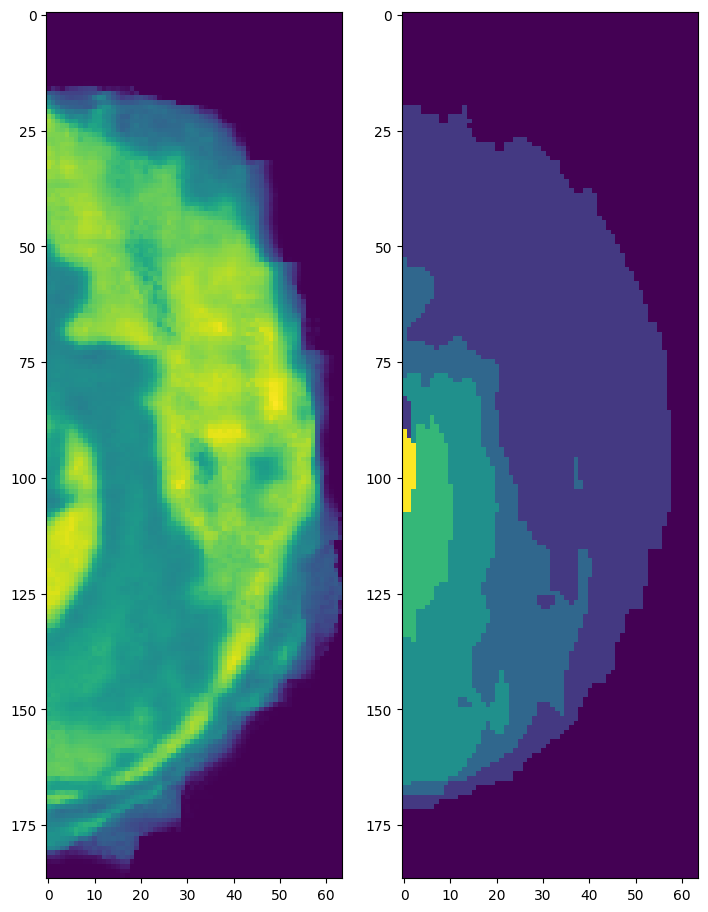

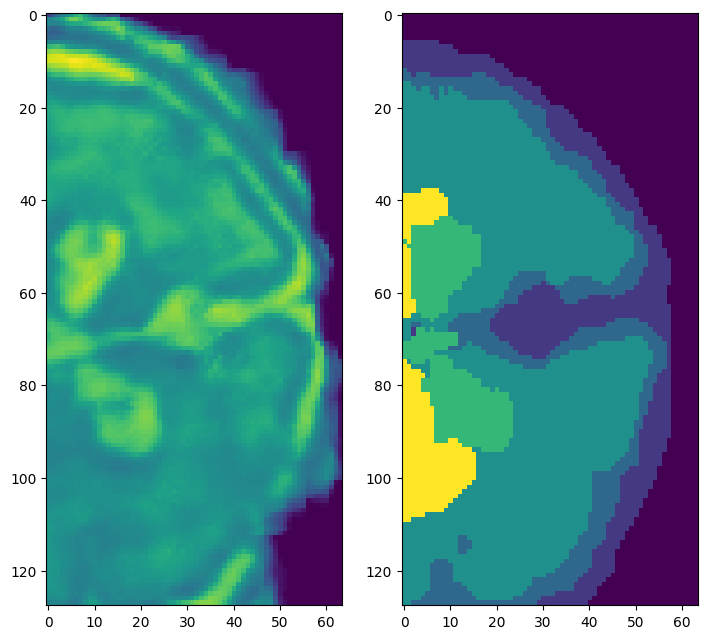

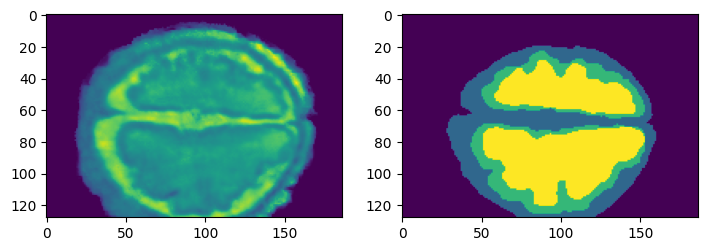

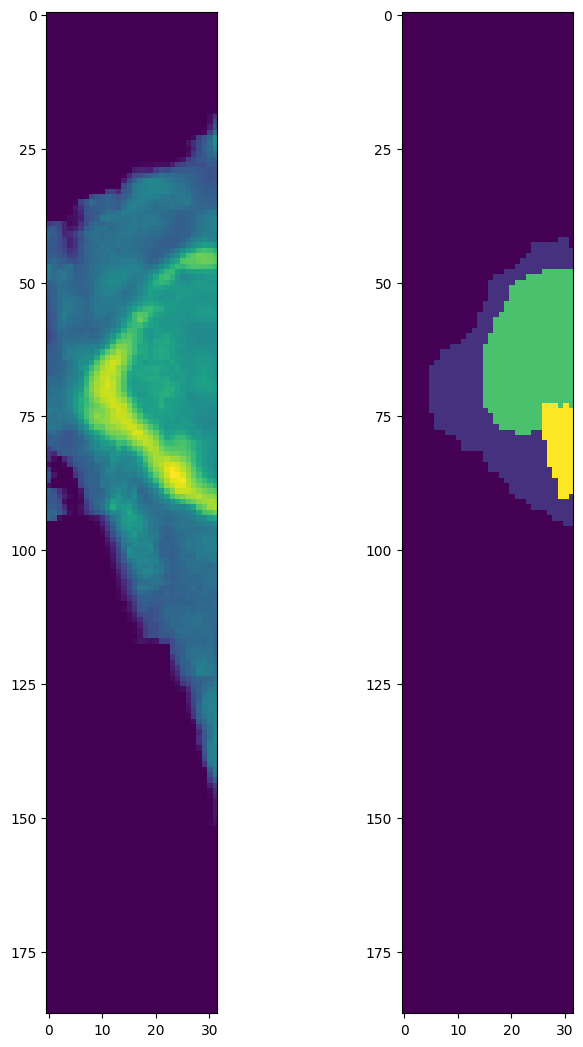

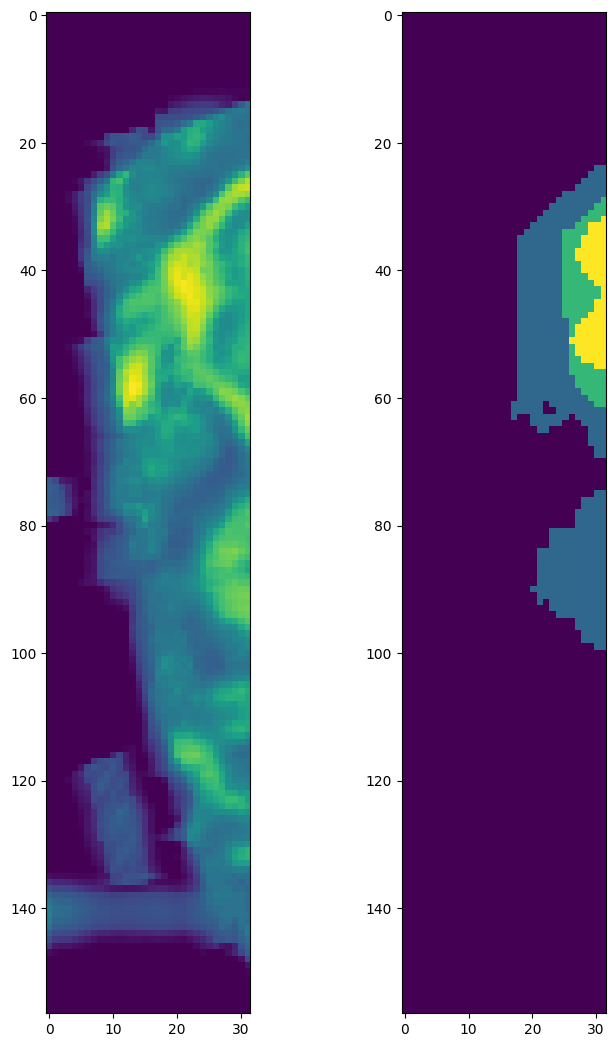

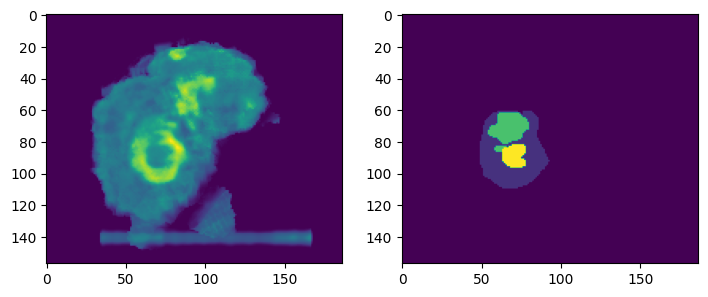

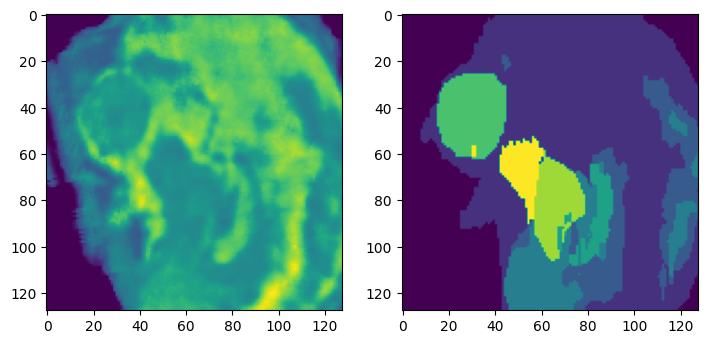

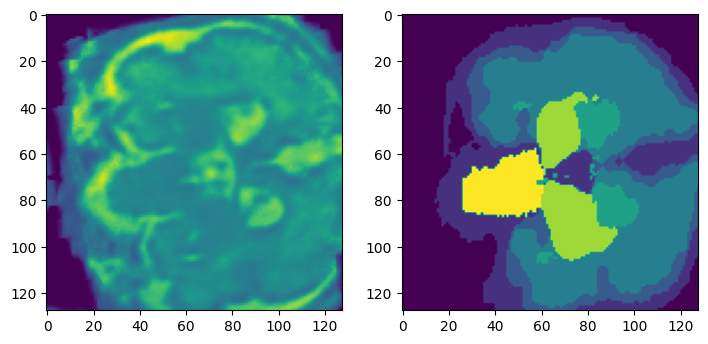

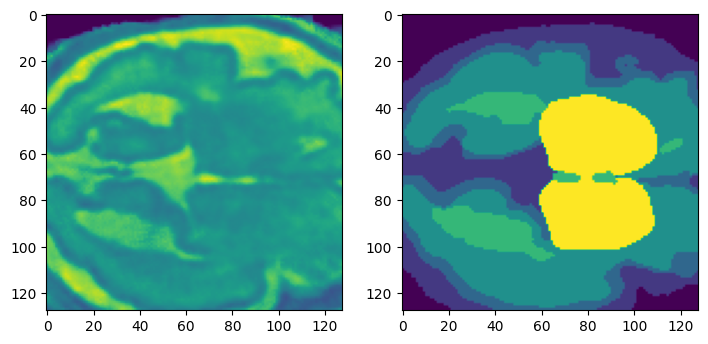

In [6]:
patches = get_patches(mri, mask)

for mri_patch, mask_patch in patches:
    center_x = int(mri_patch.shape[0]/2)
    center_y = int(mri_patch.shape[1]/2)
    center_z = int(mri_patch.shape[2]/2)
    
    
    plot_sub(mri_patch[center_x], mask_patch[center_x])
    plot_sub(mri_patch[:, center_y], mask_patch[:, center_y])
    plot_sub(mri_patch[:, :, center_z], mask_patch[:, :, center_z])

In [7]:
mri_patch.shape

(128, 128, 128)